## Title of Research Paper


## Introduction
What demographic and voting factors within a county best explain the US 2020 presidential election results?\
Write a brief introduction of your project (two to four para-graphs)

## Dataset Cleaning and Loading

- Name of your main dataset and additional datasets if you are using them in this report.
- Where are those data come from? In what format? (i.e. csv) In this project, all dataset files are in CSV format, so they could be directly loaded to jupyter notebook.
- When merging data from different datasets, it needs to identify fields are used to merge the datasets. In this step, we need to standardise data column name (for better readable code) and field format (i.e. all uppercase, remove unnecessary word/spaces, data type conversion if necessary).  
- When merging datasources, some data might not be availble from one of them, it needs to identify the impact and clearly state all assumptions.


In [86]:
import pandas as pd
import numpy as np
import qeds
import matplotlib.pyplot as plt

# load president_county_candidate.csv
president_county_cand = pd.read_csv('..\\Data\\president_county_candidate.csv')
#president_county_cand.head()

# load senate_county_candidate.csv
senate_county_cand = pd.read_csv('..\\Data\\senate_county_candidate.csv')
senate_county_cand.head()

# load governors_county_candidate.csv
governor_county_cand = pd.read_csv('..\\Data\\governors_county_candidate.csv')
governor_county_cand.head()

# load house_county_candidate.csv
house_cand = pd.read_csv('..\\Data\\house_candidate.csv')
house_cand.head()

# load US_Election_dataset_v1.csv
us_election = pd.read_csv("..\\Data\\US_Election_dataset_v1.csv")
#us_election.head()

# data cleaning: president_county_cand
# col 'state'
president_county_cand['state'] = president_county_cand['state'].str.upper()
president_county_cand['state'] = president_county_cand['state'].str.strip()
president_county_cand['state'] = president_county_cand['state'].str.replace(" ", "")
# col 'county'
president_county_cand['county'] = president_county_cand['county'].str.upper()
president_county_cand['county'] = president_county_cand['county'].str.strip()
president_county_cand['county'] = president_county_cand['county'].str.replace(" COUNTY", "")
# president_county_cand_won: filter in won is True
president_county_cand_won = president_county_cand.loc[president_county_cand['won'] == True].copy()
president_county_cand_won

# data cleaning: governor_county_cand
# col 'state'
governor_county_cand['state'] = governor_county_cand['state'].str.upper()
governor_county_cand['state'] = governor_county_cand['state'].str.strip()
# col 'County Name'
governor_county_cand['county'] = governor_county_cand['county'].str.upper()
governor_county_cand['county'] = governor_county_cand['county'].str.strip()
governor_county_cand['county'] = governor_county_cand['county'].str.replace(" COUNTY", "")
governor_county_cand['county'] = governor_county_cand['county'].str.upper()
# filter in won is True
governor_county_cand_won = governor_county_cand.loc[governor_county_cand['won'] == True].copy()

# data cleaning: house_cand
# col 'state'
house_cand['district'] = house_cand['district'].str.upper()
house_cand['district'] = house_cand['district'].str.strip()
# filter in won is True
house_cand_won = house_cand.loc[house_cand['won'] == True].copy()
#print(house_cand_won)

# data cleaning: senate_county_cand
# col 'state'
senate_county_cand['state'] = senate_county_cand['state'].str.upper()
senate_county_cand['state'] = senate_county_cand['state'].str.strip()
# col 'County Name'
senate_county_cand['county'] = senate_county_cand['county'].str.upper()
senate_county_cand['county'] = senate_county_cand['county'].str.strip()
senate_county_cand['county'] = senate_county_cand['county'].str.replace(" COUNTY", "")
senate_county_cand['county'] = senate_county_cand['county'].str.upper()
# filter in records with max total_votes (won)
senate_county_cand_won = senate_county_cand.copy()
idx = senate_county_cand_won.groupby(['state', 'county'])['total_votes'].idxmax()
senate_county_cand_won = senate_county_cand_won.loc[idx]
#print(senate_county_cand_won)

# data cleaning: us_election
us_election = us_election.rename({'State': 'state', 'County Name': 'county'}, axis=1)
# col 'state'
us_election['state'] = us_election['state'].str.upper()
us_election['state'] = us_election['state'].str.strip()
# col 'County Name'
us_election['county'] = us_election['county'].str.upper()
us_election['county'] = us_election['county'].str.strip()
us_election['county'] = us_election['county'].str.replace(" COUNTY", "")
us_election['county'] = us_election['county'].str.upper()

#us_election


In [87]:
# president_county_cand: prepare columns
party_dict = {'DEM': 'Democrat', 'REP': 'Republican'}
party_map = {'DEM': 0.0, 'REP': 1.0}
president_county_cand['Party_Index'] = president_county_cand['party'].map(party_map)
president_county_cand['party'] = president_county_cand['party'].map(lambda x: party_dict.get(x, 'Third-Party'))

# president_county_cand_won: prepare columns
president_county_cand_won['Party_Index'] = president_county_cand_won['party'].map(party_map)
president_county_cand_won['party'] = president_county_cand_won['party'].map(lambda x: party_dict.get(x, 'Third-Party'))
#print(president_county_cand_won.head())

# senate_county_cand_won: prepare columns
senate_county_cand_won['Party_Index'] = [0.0 if x == 'DEM' else 1.0 for x in senate_county_cand_won['party']]
senate_county_cand_won['party'] = senate_county_cand_won['party'].map(lambda x: party_dict.get(x, 'Third-Party'))
#print(senate_county_cand_won.head())

# governor_county_cand_won: prepare columns
governor_county_cand_won['Party_Index'] = [0.0 if x == 'DEM' else 1.0 for x in governor_county_cand_won['party']]
governor_county_cand_won['party'] = governor_county_cand_won['party'].map(lambda x: party_dict.get(x, 'Third-Party'))
#print(governor_county_cand_won.head())

# house_cand_won: prepare columns
house_cand_won['Party_Index'] = [0.0 if x == 'DEM' else 1.0 for x in house_cand_won['party']]
house_cand_won['party'] = house_cand_won['party'].map(lambda x: party_dict.get(x, 'Third-Party'))
#print(house_cand_won.head())

# us_election: prepare new columns
us_election['Median income (dollars)'] = us_election['Median income (dollars)'].str.strip()
us_election['Median income (dollars)'] = us_election['Median income (dollars)'].str.replace(',', '')
us_election['Median_Income'] = us_election['Median income (dollars)'].astype('float')
us_election['Median_Income'] = us_election['Median_Income'].div(1000.0)
us_election['Won_Vote'] = us_election[["2020 Democrat vote raw","2020 Republican vote raw","2020 other vote raw"]].max(axis=1)
us_election['Total_Vote'] = us_election["2020 Democrat vote raw"] + us_election["2020 Republican vote raw"] + us_election["2020 other vote raw"]
us_election['Vote_Percentage'] = (us_election["Won_Vote"] / us_election["Total_Vote"]) * 100
us_election['Degree_Or_Higher_Percentage'] = us_election["Associates Degree"].str.rstrip('%').astype('float') + us_election["Bachelors Degree"].str.rstrip('%').astype('float') + us_election["Graduate or professional degree"].str.rstrip('%').astype('float')
#us_election.head()

# merge datasets
final_df = pd.merge(president_county_cand_won, us_election, on=['state', 'county'], how="inner")
#print(final_df.count())





## Summary Statistics Tables
Create at least four plots/figures/histograms for a passing mark.\
State and describe the X and Y variables.
Party Index: 0 = democrat, 1 = Republican


|                   |  Mean    | Median   |  Mode   |  Range               |  Min     |   Max     |  Count  | Standard Deviation  |
| ----------------- | ------   | ------   | ------  | -------------------- | -----    | ------    | ------- | ------------------- |
| **Income**        | 63305.60 | 60931.00 | 6125.00 | 17900.00 - 170463.00 | 17900.00 | 170463.00 | 3142    | 16819.01            |
| **Population**    |          |          |         |                      |          |           |         |                     |
| **Education**     | 33.11%   | 31.60%   | 34.50%  | 7.50% - 81.00%       | 81.00%   | 7.50%     | 3143    | 10.40%              |
| **Urban Density** |          |          |         |                      |          |           |         |                     |


|               |  Mean    | Median   |  Mode   |  Range               |  Min     |   Max     |  Count  | Standard Deviation  |
| ------------- | ------   | ------   | ------  | -------------------- | -----    | ------    | ------- | ------------------- |
| **Governor**  | 0.921951 | 1.0      | 1.0     | 0.0 - 1.0            | 0.0      | 1.0       | 1025    | 0.268379            |
| **House**     | 0.488532 | 0.0      | 0.0     | 0.0 - 1.0            | 0.0      | 1.0       | 436     | 0.500443            |
| **Senate**    | 0.309378 | 0.0      | 0.0     | 0.0 - 1.0            | 0.0      | 1.0       | 3423    | 0.462305            |



In [88]:
# Get statistics

print("\n====================")
print("Governor:")
print("====================")
print(governor_county_cand_won['Party_Index'].describe())
print("\n====================")
print("Governor - MEDIAN:")
print("====================")
print(governor_county_cand_won['Party_Index'].median())
print("\n====================")
print("Governor - MODE:")
print("====================")
print(governor_county_cand_won['Party_Index'].mode())

print("\n====================")
print("House:")
print("====================")
print(house_cand_won['Party_Index'].describe())
print("\n====================")
print("House - MEDIAN:")
print("====================")
print(house_cand_won['Party_Index'].median())
print("\n====================")
print("House - MODE:")
print("====================")
print(house_cand_won['Party_Index'].mode())

print("\n====================")
print("Senate:")
print("====================")
print(senate_county_cand_won['Party_Index'].describe())
print("\n====================")
print("Senate - MEDIAN:")
print("====================")
print(senate_county_cand_won['Party_Index'].median())
print("\n====================")
print("Senate - MODE:")
print("====================")
print(senate_county_cand_won['Party_Index'].mode())

# generate statistics
print("\n====================")
print("4 Variables:")
print("====================")
columns = ["Median_Income", "Degree_Or_Higher_Percentage", "Density per square km", "Gini Index"]
print(us_election[columns].describe().transpose())
print("\n====================")
print("4 Variables - MEDIAN:")
print("====================")
print(us_election[columns].median())
print("\n====================")
print("4 Variables - MODE:")
print("====================")
print(us_election[columns].mode())





Governor:
count    1025.000000
mean        0.921951
std         0.268379
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Party_Index, dtype: float64

Governor - MEDIAN:
1.0

Governor - MODE:
0    1.0
Name: Party_Index, dtype: float64

House:
count    436.000000
mean       0.488532
std        0.500443
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Party_Index, dtype: float64

House - MEDIAN:
0.0

House - MODE:
0    0.0
Name: Party_Index, dtype: float64

Senate:
count    3423.000000
mean        0.309378
std         0.462305
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Party_Index, dtype: float64

Senate - MEDIAN:
0.0

Senate - MODE:
0    0.0
Name: Party_Index, dtype: float64

4 Variables:
                              count        mean         std      min  \
Median_Income                3142.0   63.30

## Plots, Histograms, Figures

Create at least four plots/figures/histograms for a passing mark.

### Graph-1: Number of counties won President vs Party

[Text(0, 0, '514'), Text(0, 0, '2575')]

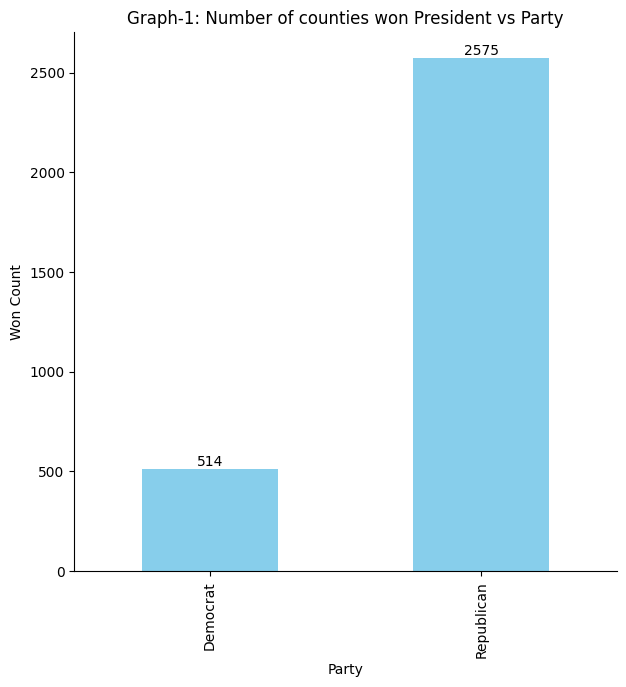

In [89]:
# Graph-1: Number of counties won President vs Party

# calculate value counts
counts = final_df['party'].value_counts()

fig, ax = plt.subplots(figsize=(7, 7))
counts.sort_index().plot(kind='bar', color='skyblue')

# plot barchart
ax.set_xlabel('Party')
ax.set_ylabel('Won Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Graph-1: Number of counties won President vs Party")
ax.bar_label(ax.containers[0])


### Graph-2: Percentage of votes won within the county vs Median Income

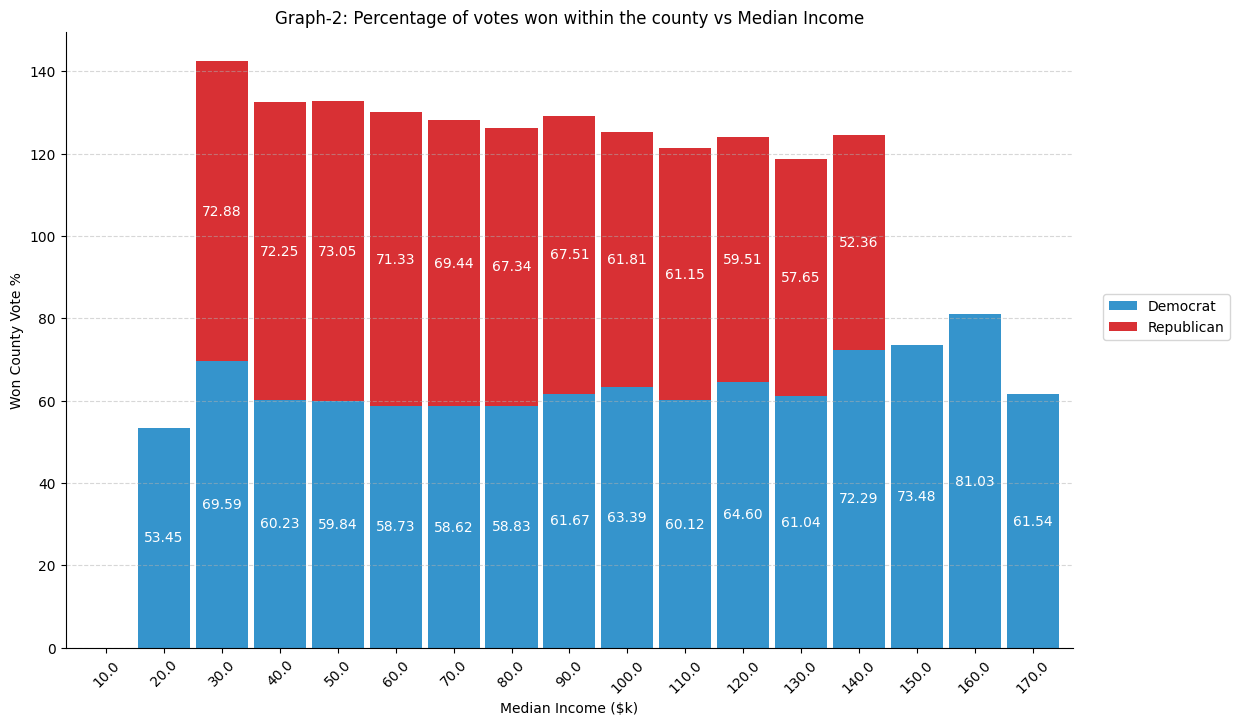

In [90]:
# Graph-2: Percentage of votes won within the county vs Median Income
# select columns to be ploted
data_df = final_df[['Median_Income', 'Vote_Percentage', 'party']]

# Define custom colors for each type
colors = ['#3594cc', '#d83034', '#36b700']  

# group Education attainment in range
income_bins = np.arange(5.0, 180.0, 10.)
pivot1_df = data_df.copy()
pivot1_df['IncomeGroup'] = pd.cut(data_df["Median_Income"], bins=income_bins)
pivot1_df['IncomeGroupMid'] = pivot1_df['IncomeGroup'].apply(lambda x: x.mid)
pivot2_df = pivot1_df.groupby(['party', 'IncomeGroupMid'], observed=False).agg(Vote_Percentage_Mean=('Vote_Percentage', 'mean')).reset_index().copy()

# Pivot the DataFrame
pivot3_df = pivot2_df.pivot(index='IncomeGroupMid', columns='party', values='Vote_Percentage_Mean')

# Plotting with custom colors
ax = pivot3_df.plot(kind='bar', stacked=True, figsize=(13, 8), width=0.9, color=colors)

# Adding values on the bars
for i, party in enumerate(pivot3_df.index):
    bottom = 0  # Track the bottom of each stack
    for j, type_col in enumerate(pivot3_df.columns):
        value = pivot3_df.loc[party, type_col]
        if value > 0:  # Only display values greater than 0
            ax.text(
                x=i,  # x-position of the bar
                y=bottom + value / 2,  # y-position (middle of the stack segment)
                s=f'{value:.2f}',  # Display value with 2 decimal places
                ha='center',  # Horizontal alignment
                va='center',  # Vertical alignment
                color='white',  # Text color
                fontsize=10  # Font size
            )
        bottom += value  # Update the bottom for the next stack segment

# Adding labels and title
plt.xlabel('Median Income ($k)')
plt.ylabel('Won County Vote %')
plt.title('Graph-2: Percentage of votes won within the county vs Median Income')
plt.legend(loc=(1.03, 0.5))
plt.xticks(rotation = 45)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()


### Graph-3: Percentage of votes for the won party in the county vs Degree attainment (Assoc. Degree/ Bachelor, or higher)


Text(0.5, 1.0, 'Democrat')

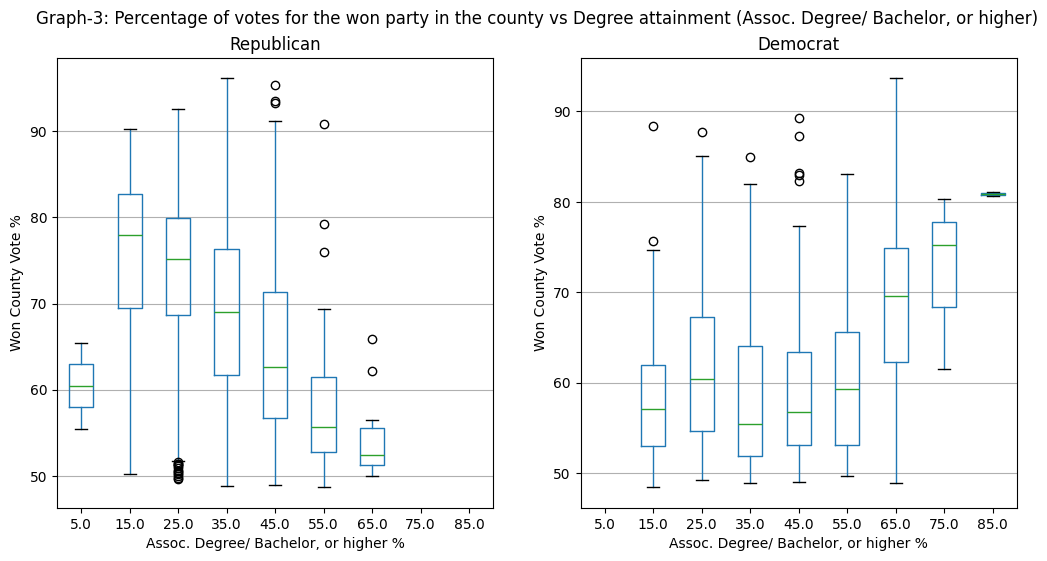

In [91]:
# Graph-3: Graph-3: Percentage of votes for the won party in the county vs Degree attainment (Assoc. Degree/ Bachelor, or higher)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# select columns to be ploted
data_df = final_df[["Degree_Or_Higher_Percentage", "Vote_Percentage", "party"]]

# group Education attainment in range
education_bins = np.arange(0, 100, 10)
g2_df = data_df.copy()
g2_df['EducationGroup'] = pd.cut(data_df["Degree_Or_Higher_Percentage"], bins=education_bins)
g2_df['EducationGroupMid'] = g2_df['EducationGroup'].apply(lambda x: x.mid)
rep_df = g2_df[g2_df['party']=='Republican'].copy()
rep_df.boxplot(by='EducationGroupMid', column =['Vote_Percentage'], ax=ax[0], grid = False) 
dem_df = g2_df[g2_df['party']=='Democrat'].copy()
dem_df.boxplot(by='EducationGroupMid', column =['Vote_Percentage'], ax=ax[1], grid = False) 


fig.suptitle("Graph-3: Percentage of votes for the won party in the county vs Degree attainment (Assoc. Degree/ Bachelor, or higher)")
ax[0].grid(axis='y')
ax[0].set_xlabel("Assoc. Degree/ Bachelor, or higher %")
ax[0].set_ylabel('Won County Vote %')
ax[0].set_title("Republican")
ax[1].grid(axis='y')
ax[1].set_xlabel("Assoc. Degree/ Bachelor, or higher %")
ax[1].set_ylabel('Won County Vote %')
ax[1].set_title("Democrat")

### Graph-4: Percentage of votes won within county vs Population of county

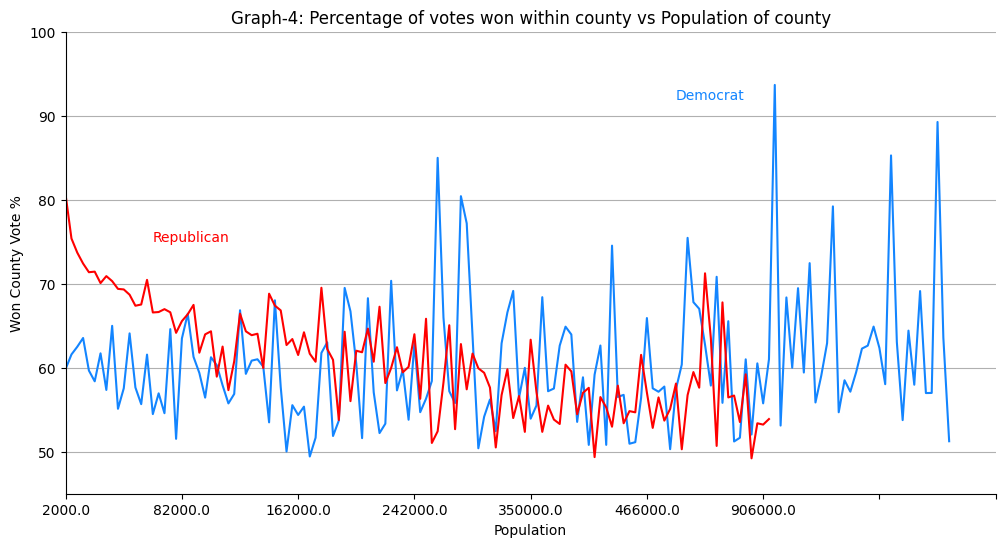

In [96]:
# Graph-4: Percentage of votes won within county vs Population of county

fig, ax = plt.subplots(figsize=(12, 6))

# select columns to be ploted
data_df = final_df[["Total Population", "Vote_Percentage", "party"]]

# group population in range
population_bins = np.arange(0, 1000000, 4000)
#x_ticks = np.arange(0, 1000000, 10000)

g4_df = data_df.copy()
g4_df['TotalPopulationGroup'] = pd.cut(data_df["Total Population"], bins=population_bins)

# create Average of Vote Percentage
g4_df = g4_df.groupby(['TotalPopulationGroup', 'party'], observed=False).agg(
                Averge_Vote_Percentage=('Vote_Percentage', 'mean')
                ).reset_index()
g4_df['TotalPopulationGroupMid'] = g4_df['TotalPopulationGroup'].apply(lambda x: x.mid)
g4_df.set_index('TotalPopulationGroupMid', inplace=True)

# plot chart
colors = {'Democrat': '#1385ff', 'Republican': 'red', 'Third-Party': 'purple'}

dem_df = g4_df[g4_df['party']=='Democrat'].copy()
dem_df.dropna(subset=["Averge_Vote_Percentage"], inplace=True)
dem_df.plot(y='Averge_Vote_Percentage', ax=ax, legend=False, color=colors["Democrat"])

rep_df = g4_df[g4_df['party']=='Republican'].copy()
rep_df.dropna(subset=["Averge_Vote_Percentage"], inplace=True)
rep_df.plot(y='Averge_Vote_Percentage', ax=ax, legend=False, color=colors["Republican"])

ax.grid(axis='y')
ax.set_xlabel("Population")
ax.set_ylabel('Won County Vote %')
ax.set_title("Graph-4: Percentage of votes won within county vs Population of county")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(45, 100)
ax.set_xlim((0, 160))

ax.annotate("Democrat", (105, 92), color=colors["Democrat"])
ax.annotate("Republican", (15, 75), color=colors["Republican"]);


### Graph-5: Number of votes for each party president vs State

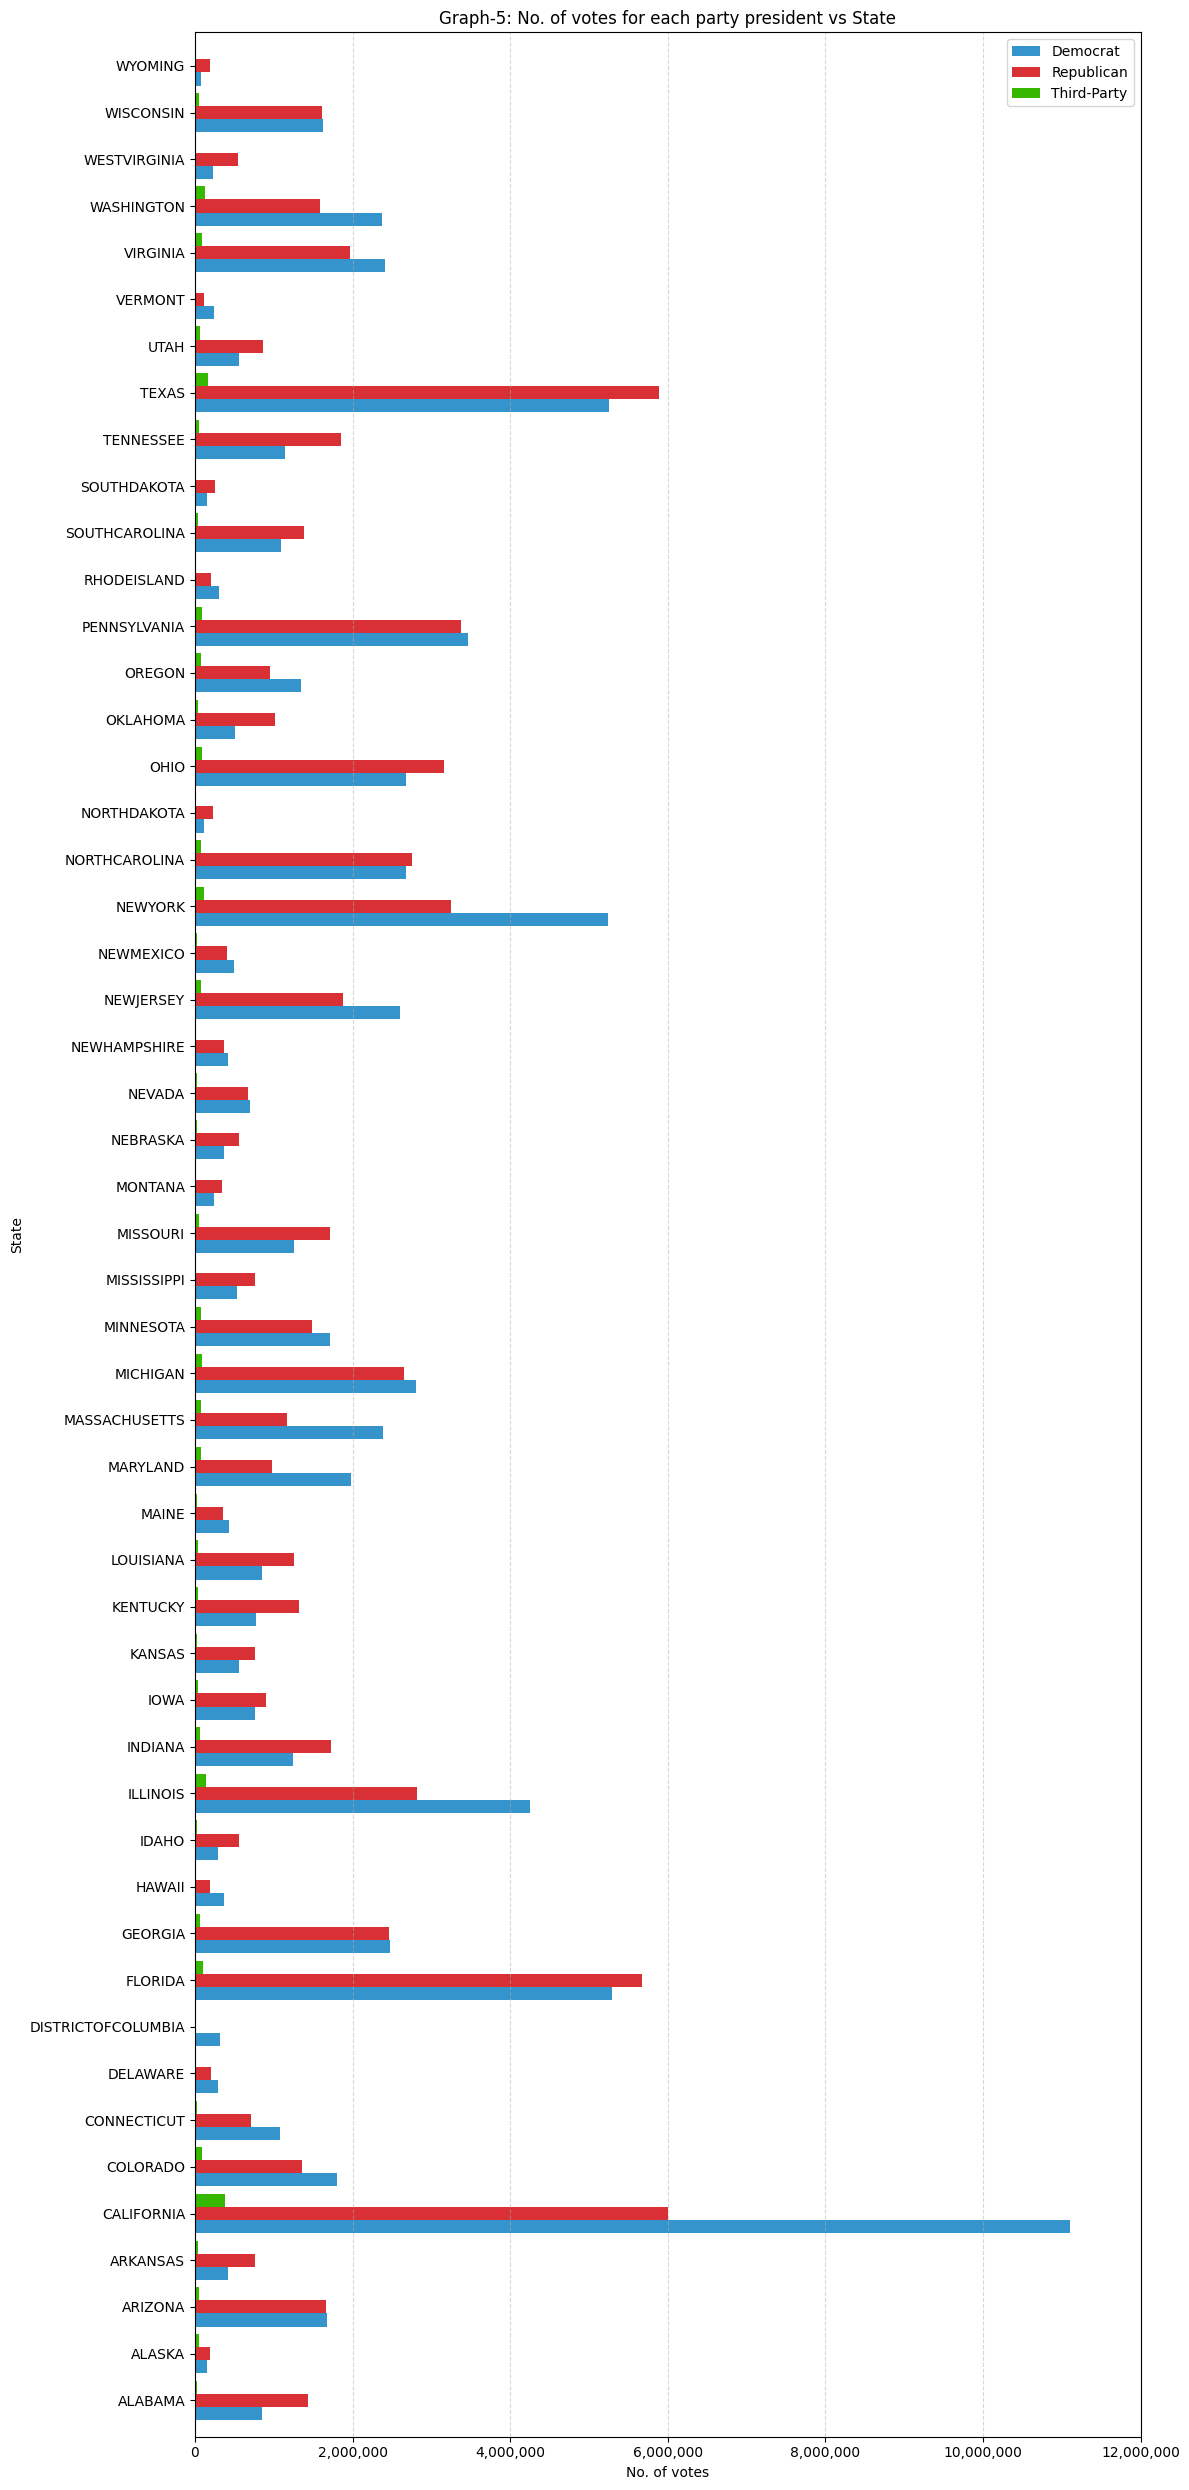

In [97]:
# Graph-5: Number of votes for each party president vs State

# select columns to be ploted
data_df = president_county_cand.groupby(['state','party']).agg({'total_votes': 'sum'})
data_df = data_df.reset_index()
#data_df

# Reshape the DataFrame using pivot_table
pivot_df = data_df.pivot_table(index='state', columns='party', values='total_votes', aggfunc='sum').reset_index()

# Fill missing values with 0 (if any)
pivot_df = pivot_df.fillna(0)

# plot graph
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 25))

# Define custom colors for each type
colors = {
    'Democrat': '#3594cc',  # Blue
    'Republican': '#d83034',  # Red
    'Third-Party': '#36b700'  # Green
}

# Number of states
n_states = len(pivot_df['state'])

# Height of the bars
bar_height = 0.28

# Positions for the bars
index = np.arange(n_states)

# Plotting each party
for i, party in enumerate(['Democrat', 'Republican', 'Third-Party']):
    ax.barh(index + i * bar_height, pivot_df[party], bar_height, label=party, color=colors[party])

# Adding labels and title
ax.set_xlabel('No. of votes')
ax.set_ylabel('State')
ax.set_title('Graph-5: No. of votes for each party president vs State')
ax.set_yticks(index + bar_height)
ax.set_yticklabels(pivot_df['state'])
ax.legend()
ax.grid(axis='x', linestyle='--', alpha=0.5)

# Format x-axis ticks as integers
def format_votes(x, pos):
    return f'{int(x):,}'  # Format as integer with commas as thousand separators

# format x-axis label
ax.xaxis.set_major_formatter(FuncFormatter(format_votes))

# Adjust y-axis limits to remove extra white space
ax.set_xlim(0, 12000000)
ax.set_ylim(-0.5, n_states)  # Adjust the limits to fit the bars tightly

# Move the legend to the top
#ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=3, fontsize='medium')

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\kwang\AppData\Local\Temp\ipykernel_17756\2877660496.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data_df.groupby('Pop_Density_Bin')[['DEM_Vote', 'REP_Vote', 'THIRDPARTY_Vote', 'Total_Vote']].sum()


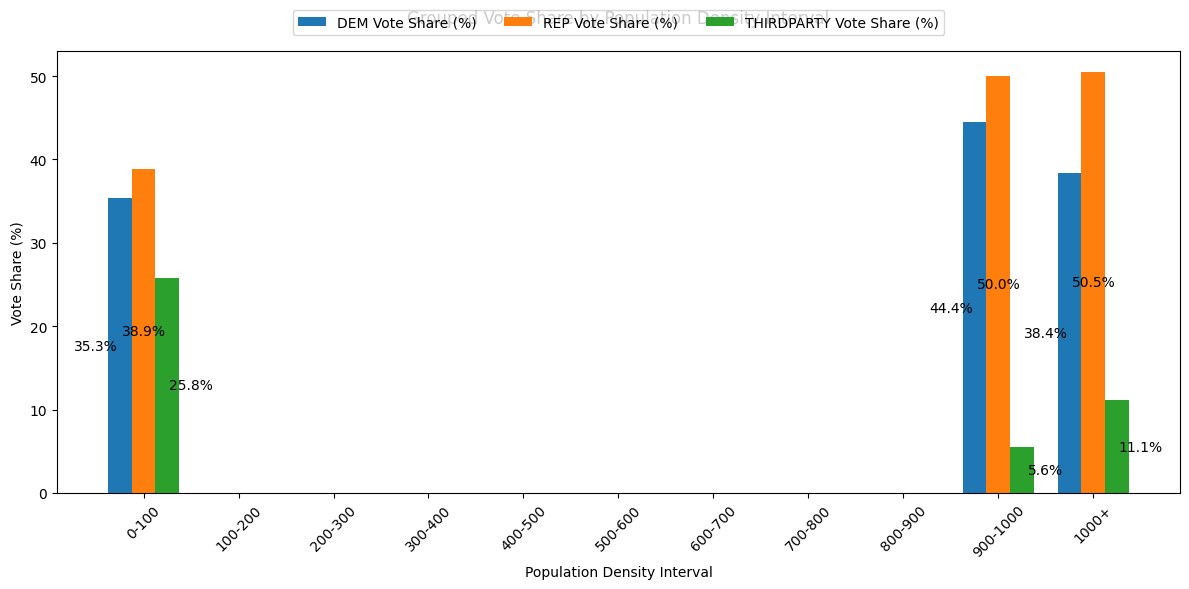

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create the DataFrame
data_df = {
    'County': ['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], 
    'DEM_Vote': [150, 280, 339, 500, 1200, 800, 200], 
    'REP_Vote': [450, 109, 288, 700, 1500, 900, 300], 
    'THIRDPARTY_Vote': [18, 99, 444, 200, 300, 100, 50], 
    'Total_Vote': [618, 488, 1071, 1400, 3000, 1800, 550],
    'Pop_Density': [78, 50, 32, 1200, 1500, 950, 1100]  # Added more population density values
}
data_df = pd.DataFrame(data_df)

# Define custom bins for population density: 0-100 in steps of 100, and 1000+
bins = list(range(0, 1100, 100)) + [np.inf]  # 0-100, 100-200, ..., 900-1000, 1000+

# Assign each county to a population density bin
data_df['Pop_Density_Bin'] = pd.cut(data_df['Pop_Density'], bins=bins, right=False)

# Group by the population density bin and calculate the total votes for each party in each bin
grouped = data_df.groupby('Pop_Density_Bin')[['DEM_Vote', 'REP_Vote', 'THIRDPARTY_Vote', 'Total_Vote']].sum()

# Calculate the vote share percentage for each party in each bin
grouped['DEM_Share'] = grouped['DEM_Vote'] / grouped['Total_Vote'] * 100
grouped['REP_Share'] = grouped['REP_Vote'] / grouped['Total_Vote'] * 100
grouped['THIRDPARTY_Share'] = grouped['THIRDPARTY_Vote'] / grouped['Total_Vote'] * 100

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Define the x-axis labels (bin intervals)
x_labels = [f'{int(b.left)}-{int(b.right)}' if not np.isinf(b.right) else '1000+' for b in grouped.index]

# Convert the vote share columns to NumPy arrays
dem_share = grouped['DEM_Share'].values
rep_share = grouped['REP_Share'].values
thirdparty_share = grouped['THIRDPARTY_Share'].values

# Define the width of each bar
bar_width = 0.25  # Width of each individual bar

# Define the positions for the bars
x = np.arange(len(x_labels))  # x-axis positions for the groups

# Plot the side-by-side bars
ax.bar(x - bar_width, dem_share, width=bar_width, label='DEM Vote Share (%)')
ax.bar(x, rep_share, width=bar_width, label='REP Vote Share (%)')
ax.bar(x + bar_width, thirdparty_share, width=bar_width, label='THIRDPARTY Vote Share (%)')

# Add values inside the bars
def add_values(bars, offset=0):
    for i, bar in enumerate(bars):
        height = bar.get_height()
        x_pos = bar.get_x() + bar.get_width() / 2 + offset
        ax.text(x_pos, height / 2, f'{height:.1f}%', ha='center', va='center', color='black', fontsize=10)

# Add values to each bar
add_values(ax.containers[0], offset=-bar_width)  # DEM bars
add_values(ax.containers[1], offset=0)           # REP bars
add_values(ax.containers[2], offset=bar_width)   # THIRDPARTY bars

# Add labels and title
ax.set_xlabel('Population Density Interval')
ax.set_ylabel('Vote Share (%)')
ax.set_title('Grouped Vote Share by Population Density Interval', pad=20)  # Add padding to the title

# Set x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(x_labels)

# Move the legend to the top in one row
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.02), ncol=3, fontsize='medium')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [104]:
data_df = {
    'County': ['AAA', 'BBB', 'CCC'], 
    'DEM_Vote': [150, 280, 339], 
    'REP_Vote': [450,109, 288], 
    'THIRDPARTY_Vote': [18, 99, 444], 
    'Total_Vote': [618, 488, 1071],
    'Pop_Density': [78, 50, 32]
}
data_df = pd.DataFrame(data_df)

Please create a histogram chart the with x-axis is Pop_Density and cut by interval from 0 to 100 (interval is 10).
y-axis is vote share % of all counties of that pop_density interval. For each bar, stacked vote share% of 'DEM', 'REP'and 'THIRDPARTY' 

  County  DEM_Vote  REP_Vote  THIRDPARTY_Vote  Total_Vote  Pop_Density
0    AAA       150       450               18         618           78
1    BBB       280       109               99         488           50
2    CCC       339       288              444        1071           32


### Graph-6: Vote share for the different parties' president vs Urban density

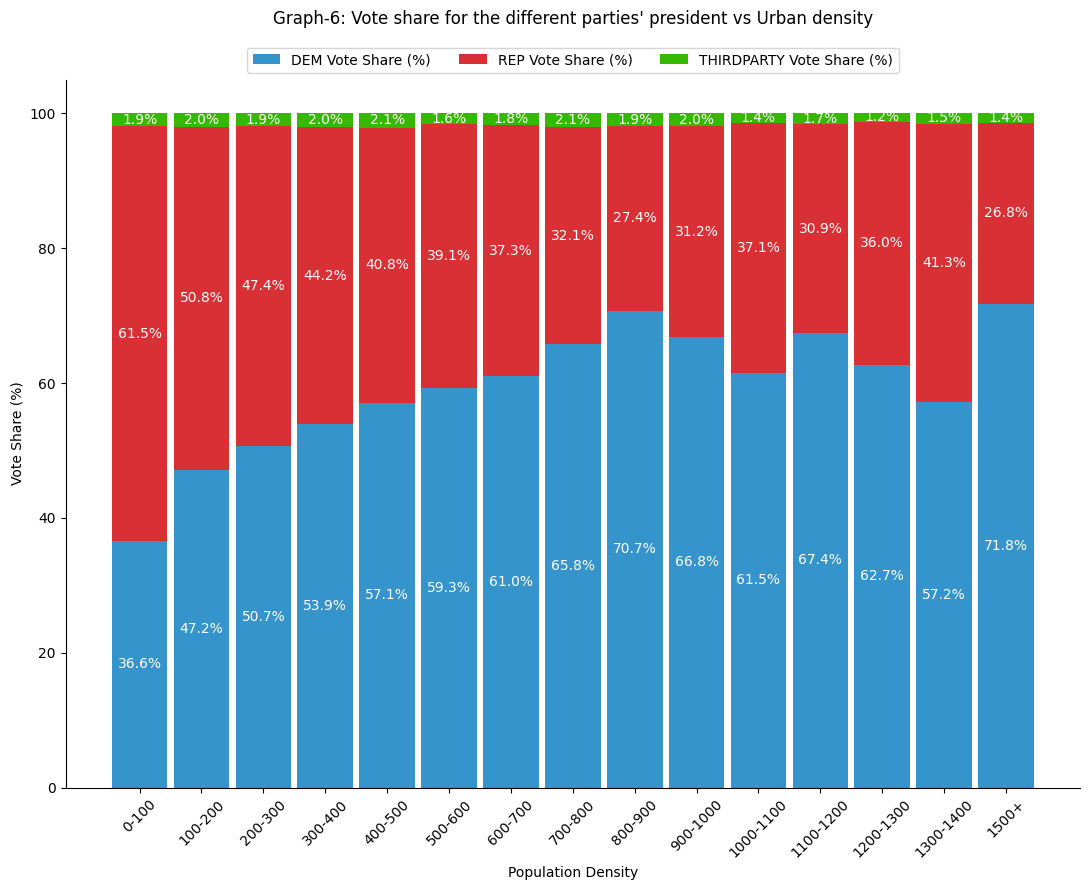

In [175]:
# Graph-6: Vote share for the different parties' president vs Urban density

# select columns to be ploted
data_df = us_election.copy()

# Define custom bins for population density: 0-1500 in steps of 100, and 1500+
density_bins = list(range(0, 1500, 100)) + [np.inf]  
# Assign each county to a population density bin
data_df['Density_Bin'] = pd.cut(data_df['Density per square km'], bins=density_bins, right=False)

# Group by the density bin and calculate the total votes for each party in each bin
grouped_df = data_df.groupby('Density_Bin', observed=False)[['2020 Democrat vote raw', '2020 Republican vote raw', '2020 other vote raw', 'Total_Vote']].sum()

# Calculate the vote share percentage for each party in each bin
grouped_df['DEM_Share'] = grouped_df['2020 Democrat vote raw'] / grouped_df['Total_Vote'] * 100
grouped_df['REP_Share'] = grouped_df['2020 Republican vote raw'] / grouped_df['Total_Vote'] * 100
grouped_df['THIRDPARTY_Share'] = grouped_df['2020 other vote raw'] / grouped_df['Total_Vote'] * 100


# Plot the stacked histogram
fig, ax = plt.subplots(figsize=(11, 9))

# Define custom colors for each type
colors = {
    'Democrat': '#3594cc',  # Blue
    'Republican': '#d83034',  # Red
    'Third-Party': '#36b700'  # Green
}

# Define the x-axis labels (bin intervals)
x_labels = [f'{int(b.left)}-{int(b.right)}' if not np.isinf(b.right) else '1500+' for b in grouped_df.index]

# Convert the vote share columns to NumPy arrays
dem_share = grouped_df['DEM_Share'].values
rep_share = grouped_df['REP_Share'].values
thirdparty_share = grouped_df['THIRDPARTY_Share'].values

# Plot the stacked bars
bar_width = 0.9
dem_bars = ax.bar(x_labels, dem_share, label='DEM Vote Share (%)', color=colors['Democrat'], width=bar_width)
rep_bars = ax.bar(x_labels, rep_share, bottom=dem_share, label='REP Vote Share (%)', color=colors['Republican'], width=bar_width)
thirdparty_bars = ax.bar(x_labels, thirdparty_share, bottom=dem_share + rep_share, label='THIRDPARTY Vote Share (%)', 
                         color=colors['Third-Party'], width=bar_width)

# Add values inside the bars
def add_values(bars, bottom=None):
    for i, bar in enumerate(bars):
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_y() + height / 2 if bottom is None else bottom[i] + height / 2
        ax.text(x, y, f'{height:.1f}%', ha='center', va='center', color='white', fontsize=10)

# Add values to each stacked bar
add_values(dem_bars)
add_values(rep_bars, bottom=dem_share)
add_values(thirdparty_bars, bottom=dem_share + rep_share)

# Add labels and title
ax.set_xlabel('Population Density')
ax.set_ylabel('Vote Share (%)')
ax.set_title("Graph-6: Vote share for the different parties' president vs Urban density", pad=40)
# Move the legend to the top in one row
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=3, fontsize='medium')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()



### Graph-7: Proportion of counties won by each party vs Eelection Type

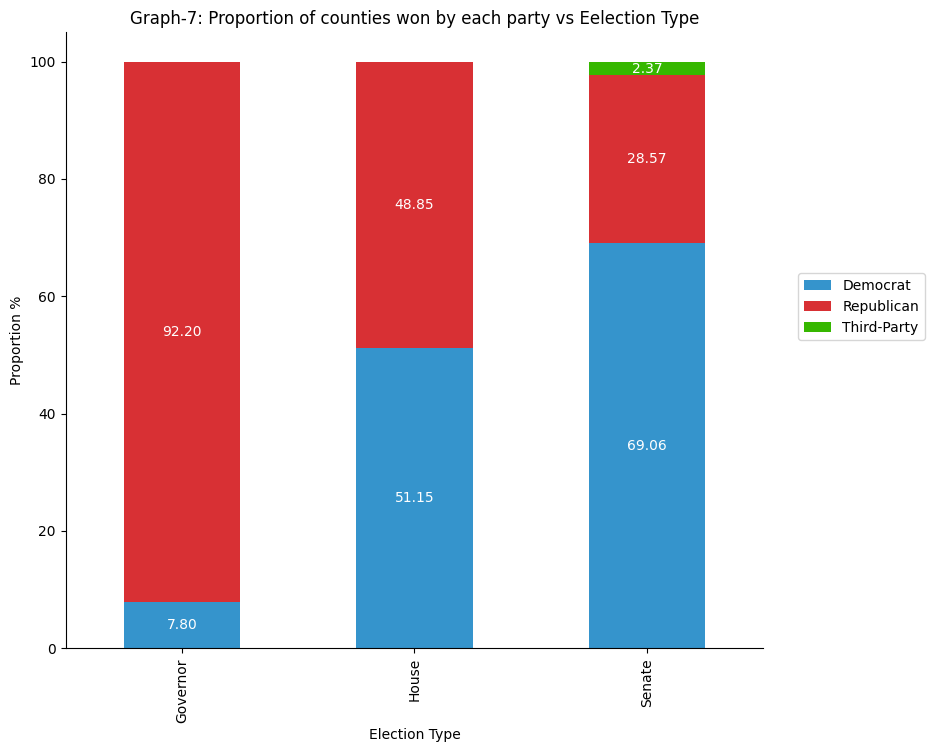

In [192]:
# Graph-7: Proportion of counties won by each party vs Eelection Type

# Prepare data
house_df = house_cand_won.groupby('party').agg(Proportion=('party', 'count')).reset_index().copy()
house_total_count = house_cand_won['party'].count()
house_df['Proportion'] = (house_df['Proportion'] / house_total_count) * 100.0

senate_df = senate_county_cand_won.groupby('party').agg(Proportion=('party', 'count')).reset_index().copy()
senate_total_count = senate_county_cand_won['party'].count()
senate_df['Proportion'] = (senate_df['Proportion'] / senate_total_count) * 100.0

governor_df = governor_county_cand_won.groupby('party').agg(Proportion=('party', 'count')).reset_index().copy()
governor_total_count = governor_county_cand_won['party'].count()
governor_df['Proportion'] = (governor_df['Proportion'] / governor_total_count) * 100.0

# Combine the DataFrames
house_df['Election Type'] = 'House'
senate_df['Election Type'] = 'Senate'
governor_df['Election Type'] = 'Governor'
combined_df = pd.concat([house_df, senate_df, governor_df])

# Pivot the DataFrame
#pivot_df = combined_df.pivot(index='party', columns='Election Type', values='Proportion')
pivot_df = combined_df.pivot(index='Election Type', columns='party', values='Proportion')

# Define custom colors for each type
colors = ['#3594cc', '#d83034', '#36b700']  
#colors = {
#    'Democrat': '#3594cc',  # Blue
#    'Republican': '#d83034',  # Red
#    'Third-Party': '#36b700'  # Green
#}

# Plotting with custom colors
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(9, 8), color=colors)

# Adding values on the bars
for i, party in enumerate(pivot_df.index):
    bottom = 0  # Track the bottom of each stack
    for j, type_col in enumerate(pivot_df.columns):
        value = pivot_df.loc[party, type_col]
        if value > 0:  # Only display values greater than 0
            ax.text(
                x=i,  # x-position of the bar
                y=bottom + value / 2,  # y-position (middle of the stack segment)
                s=f'{value:.2f}',  # Display value with 2 decimal places
                ha='center',  # Horizontal alignment
                va='center',  # Vertical alignment
                color='white',  # Text color
                fontsize=10  # Font size
            )
        bottom += value  # Update the bottom for the next stack segment

# Adding labels and title
plt.xlabel('Election Type')
plt.ylabel('Proportion %')
plt.title('Graph-7: Proportion of counties won by each party vs Eelection Type')
plt.legend(loc=(1.05, 0.5))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the plot
plt.show()

### Graph-8: Percentage of the won counties for each party vs Race

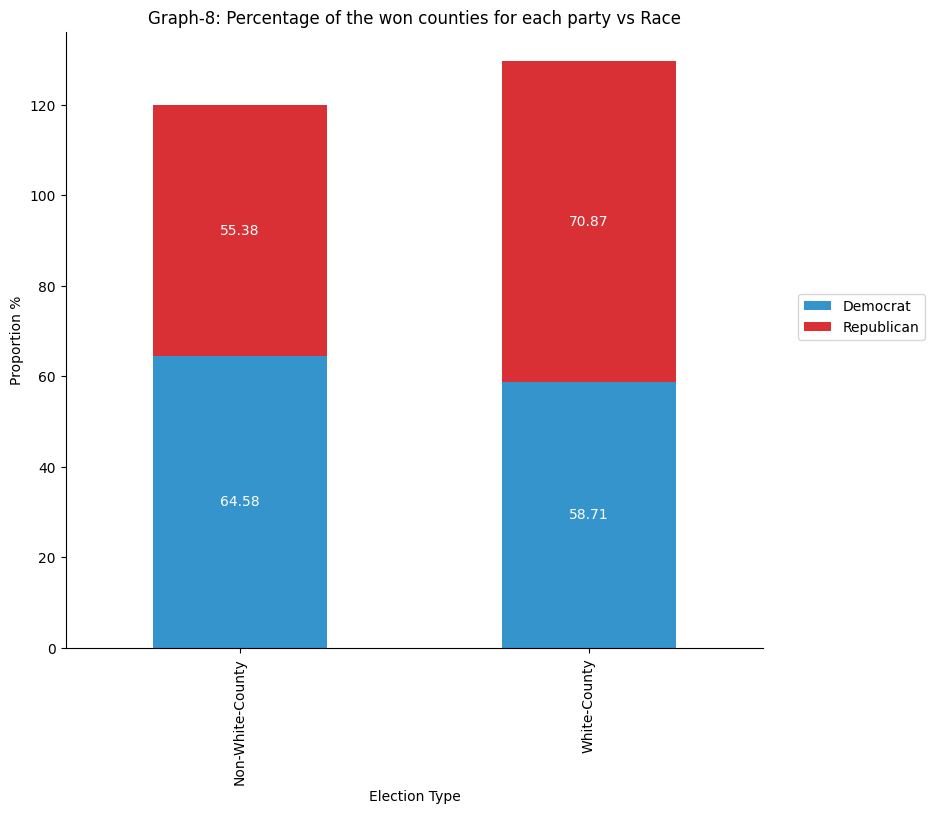

In [220]:
# Graph-8: Percentage of the won counties for each party vs Race

# select columns to be ploted
#data_df = final_df[['Median_Income', 'Vote_Percentage', 'party']]
data_df = final_df.copy()
# Calculate NH-Rest percentage
data_df['NH-Rest'] = (
    data_df['NH-Black percentage'] + 
    data_df['NH-American Indian and Alaska Native percentage'] + 
    data_df['NH-Asian percentage'] + 
    data_df['NH-Native Hawaiian and Other Pacific Islander percentage'] + 
    data_df['NH-Some Other Race percentage'] + 
    data_df['NH-Two or More Races percentage']
)

#NH-White percentage	
#NH-Black percentage	
#NH-American Indian and Alaska Native percentage	
#NH-Asian percentage	
#NH-Native Hawaiian and Other Pacific Islander percentage	
#NH-Some Other Race percentage	
#NH-Two or More Races percentage

# Classify counties as White-County or Non-White-County
data_df['Race_Type'] = np.where(
    data_df['NH-White percentage'] > data_df['NH-Rest'], 
    'White-County', 
    'Non-White-County'
)

data2_df = data_df[['party', 'Vote_Percentage', 'Race_Type']]
data2_df.head()
# create Average of Vote Percentage
data2_df = data2_df.groupby(['Race_Type', 'party'], observed=False).agg(
                Averge_Vote_Percentage=('Vote_Percentage', 'mean')
                ).reset_index()
#data2_df.set_index('Race_Type', inplace=True)
data2_df.head()

# Pivot the DataFrame
pivot_df = data2_df.pivot(index='Race_Type', columns='party', values='Averge_Vote_Percentage')

# Define custom colors for each type
colors = ['#3594cc', '#d83034', '#36b700']  
#colors = {
#    'Democrat': '#3594cc',  # Blue
#    'Republican': '#d83034',  # Red
#    'Third-Party': '#36b700'  # Green
#}

# Plotting with custom colors
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(9, 8), color=colors)

# Adding values on the bars
for i, party in enumerate(pivot_df.index):
    bottom = 0  # Track the bottom of each stack
    for j, type_col in enumerate(pivot_df.columns):
        value = pivot_df.loc[party, type_col]
        if value > 0:  # Only display values greater than 0
            ax.text(
                x=i,  # x-position of the bar
                y=bottom + value / 2,  # y-position (middle of the stack segment)
                s=f'{value:.2f}',  # Display value with 2 decimal places
                ha='center',  # Horizontal alignment
                va='center',  # Vertical alignment
                color='white',  # Text color
                fontsize=10  # Font size
            )
        bottom += value  # Update the bottom for the next stack segment

# Adding labels and title
plt.xlabel('Election Type')
plt.ylabel('Proportion %')
plt.title('Graph-8: Percentage of the won counties for each party vs Race')
plt.legend(loc=(1.05, 0.5))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the plot
plt.show()


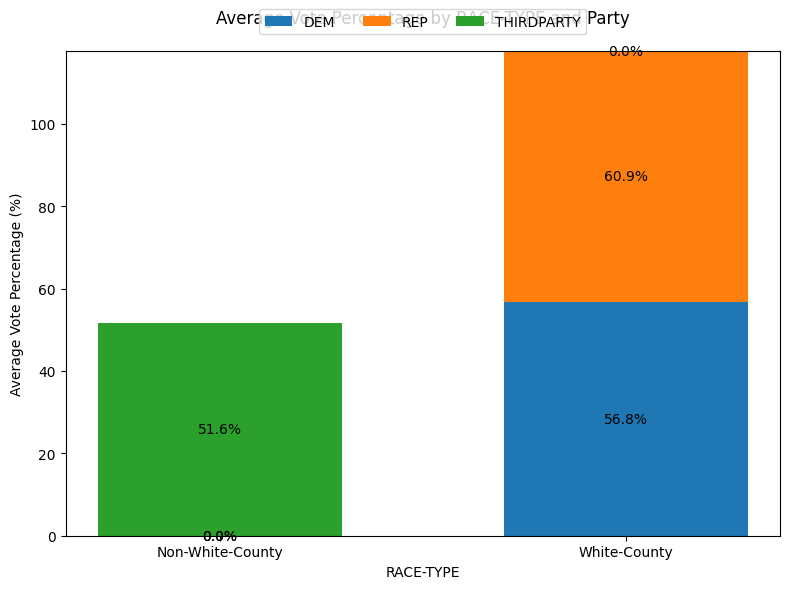

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create the DataFrame
data_df = {
    'County': ['AAA', 'BBB', 'CCC'], 
    'NH-White_Percentage': [70.71, 80.47, 43.95], 
    'NH-Black_Percentage': [19.3, 7.77, 46.98], 
    'NH-IndianAlaska_Percentage': [0.31, 0.56, 0.23], 
    'NH-Asian_Percentage': [1.48, 0.88, 0.41], 
    'NH-Hawaiian_Percentage': [0.04, 0.05, 0], 
    'NH-Other_Percentage': [0.31, 0.33, 0.25], 
    'NH-TwoMore_Percentage': [4.23, 4.47, 2.19], 
    'Vote_Percentage': [56.8, 60.9, 51.6],
    'party': ['DEM', 'REP', 'THIRDPARTY']
}
data_df = pd.DataFrame(data_df)

# Calculate NH-Rest percentage
data_df['NH-Rest'] = (
    data_df['NH-Black_Percentage'] + 
    data_df['NH-IndianAlaska_Percentage'] + 
    data_df['NH-Asian_Percentage'] + 
    data_df['NH-Hawaiian_Percentage'] + 
    data_df['NH-Other_Percentage'] + 
    data_df['NH-TwoMore_Percentage']
)

# Classify counties as White-County or Non-White-County
data_df['RACE-TYPE'] = np.where(
    data_df['NH-White_Percentage'] > data_df['NH-Rest'], 
    'White-County', 
    'Non-White-County'
)

# Use pivot_table to calculate the average Vote_Percentage for each RACE-TYPE and party
pivot_table = pd.pivot_table(
    data_df, 
    values='Vote_Percentage', 
    index='RACE-TYPE', 
    columns='party', 
    aggfunc='mean',  # Use mean to calculate the average
    fill_value=0
)

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))

# Define the x-axis categories
x_categories = pivot_table.index

# Define the positions for the bars
x = np.arange(len(x_categories))

# Define the width of each bar
bar_width = 0.6

# Plot the stacked bars for each party
bottom = np.zeros(len(x_categories))  # Initialize the bottom for stacking
for party in pivot_table.columns:
    vote_percentage = pivot_table[party].values
    ax.bar(x, vote_percentage, width=bar_width, label=party, bottom=bottom)
    bottom += vote_percentage  # Update the bottom for the next stack


# Add values to each stacked bar
add_values(ax.containers[0], bottom=np.zeros(len(x_categories)))  # DEM bars
add_values(ax.containers[1], bottom=pivot_table['DEM'].values)    # REP bars
add_values(ax.containers[2], bottom=pivot_table['DEM'].values + pivot_table['REP'].values)  # THIRDPARTY bars

# Add labels and title
ax.set_xlabel('RACE-TYPE')
ax.set_ylabel('Average Vote Percentage (%)')
ax.set_title('Average Vote Percentage by RACE-TYPE and Party', pad=20)

# Set x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(x_categories)

# Move the legend to the top in one row
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.02), ncol=3, fontsize='medium')

# Show the plot
plt.tight_layout()
plt.show()

In [198]:
data_df = {
    'County': ['AAA', 'BBB', 'CCC','DDD', 'EEE'], 
    'NH-White_Percentage': [70.71, 80.47, 43.95, 20, 21], 
    'NH-Black_Percentage': [19.3, 7.77, 46.98, 60, 61], 
    'NH-IndianAlaska_Percentage': [0.31, 0.56, 0.23,0,0], 
    'NH-Asian_Percentage': [1.48, 0.88, 0.41,0,0], 
    'NH-Hawaiian_Percentage': [0.04, 0.05, 0,0,0], 
    'NH-Other_Percentage': [0.31, 0.33, 0.25,0,0], 
    'NH-TwoMore_Percentage': [4.23, 4.47, 2.19,0,0], 
    'Vote_Percentage': [56.8, 60.9, 51.6,0,0],
    'party': ['DEM', 'REP', 'THIRDPARTY', 'REP', 'THIRDPARTY']
}
data_df = pd.DataFrame(data_df)

I need to redefine the stacked bar chart.
From the above dataframe, I would like to created a stacked bar chart whare x-axis is RACE-TYPE, has 2 categories, one is White-County and the other one is 
Non-White-County. For White-County, if  'NH-White_Percentage' is bigger than sum of ('NH-Black_Percentage', 'NH-IndianAlaska_Percentage', 'NH-IndianAlaska_Percentage', 
'NH-Asian_Percentage', 'NH-Hawaiian_Percentage', 'NH-Other_Percentage' and 'NH-TwoMore_Percentage') then it is White-County, otherwise it is Non-White-County. 
The y-axis is averge of Vote_Percentage and each bar is stacked average of Vote_Percentage value per party (i.e. 'DEM', 'REP', 'THIRDPARTY').




,County,NH-White_Percentage,NH-Black_Percentage,NH-IndianAlaska_Percentage,NH-Asian_Percentage,NH-Hawaiian_Percentage,NH-Other_Percentage,NH-TwoMore_Percentage,Vote_Percentage,party
0,AAA,70.71,19.30,0.31,1.48,0.04,0.31,4.23,56.8,DEM
1,BBB,80.47,7.77,0.56,0.88,0.05,0.33,4.47,60.9,REP
2,CCC,43.95,46.98,0.23,0.41,0.00,0.25,2.19,51.6,THIRDPARTY
3,DDD,20.00,60.00,0.00,0.00,0.00,0.00,0.00,0.0,REP
4,EEE,21.00,61.00,0.00,0.00,0.00,0.00,0.00,0.0,THIRDPARTY


In [ ]:
# Generate synthetic urbanization data (percentage of population living in urban areas)
urbanization = np.random.uniform(10, 100, num_counties)  # Percentage urban population

# Add urbanization data to the DataFrame
df["Urbanization (%)"] = urbanization

# Scatter Plot: Population vs. Democratic Vote, colored by Urbanization
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df["Population (millions)"], df["Democratic Vote (%)"], c=df["Urbanization (%)"], cmap="viridis", alpha=0.7)
plt.colorbar(scatter, label="Urbanization (%)")
plt.xlabel("Population (millions)")
plt.ylabel("Democratic Vote Share (%)")
plt.title("Population vs. Democratic Vote Share (Colored by Urbanization)")
plt.xscale("log")  # Log scale for population
plt.show()

## Conclusion
Explain your findings in brief and scientic language. The minimum length for the conclusion in this project is one paragraph. Your
conclusion should briey summarize the takeaways from your project.